# Uber Fares Dataset - Evaluating Models
Finally we will test our models! In this last notebook, we will test our three selected models (with the best set of parameters) in the test set to see what are the predictions for Uber Fares. Then, we will explore some interesting visualizations for these results.

## Imports 

In [1]:
# basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys 

sys.path.append('../')

# scikit-learn libraries 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# scattering plot
from src.visualization.visualization import scattering_true_predicted_values

# boostrap 
from src.utils.utils import BootstrapMetricsCalculator

# joblib and pickle to save models
import joblib

## Loading the Data and Models

In [27]:
root_path = '../../uber-fares-prediction/data/processed/'

# prepared validation set 
X_test_prepared = (
    pd.read_csv(root_path + 'uber_prepared_validation_set.csv')
)

# test set 
y_test = (
    pd.read_csv(root_path + 'uber_test_set.csv')
)

In [28]:
# converting into an array
y_test = np.ravel(y_test)

In [29]:
# Best Models - Random Forest, XGBoost and LGBM
random_forest_reg = joblib.load('../models/final/best_model_random_forest.pkl')
xgboost_reg = joblib.load('../models/final/best_model_xgboost_reg.pkl')
lgbm_reg = joblib.load('../models/final/best_model_lgbm_reg.pkl')

## Making Predictions

### Random Forest Regression

Let us start making our predictions for random forest model. Now we will analyze the results using RMSE, $R^{2}$ and MAE metrics implementing a boostrap into the test set to obtain a confidence interval for our results - we will implement the boostrap on the test to avoid to retrain all models in train set again. 

In [6]:
# predictions for random forest regression
random_forest_reg_predictions = random_forest_reg.predict(X_test_prepared)

#### Bootstrapped RMSE, MAE and $R^{2}$

We will calculate the RMSE, MAE and $R^{2}$ and their confidence intervals using boostrap method. To do that, we will follow the reference: https://sebastianraschka.com/blog/2022/confidence-intervals-for-ml.html

In [8]:
# instantiate bootstrap metrics calculator
bootstrap_metrics_calculator = BootstrapMetricsCalculator()
bootstrap_metrics_calculator.calculating_bootstrapped_metrics(y_test, random_forest_reg_predictions, 500)


Calculating the RMSE, MAE and $R^{2}$ and their confidence intervals:

In [9]:
# mean value of bootstrapped results and confidence intervals - rmse
bootstrap_test_mean_rmse = bootstrap_metrics_calculator.get_mean_rmse_metric()
lower_confidence_interval_rmse = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 2.5)
upper_confidence_interval_rmse = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 97.5)

In [10]:
# mean value of bootstrapped results and confidence interval - mae
bootstrap_test_mean_mae = bootstrap_metrics_calculator.get_mean_mae_metric()
lower_confidence_interval_mae = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 2.5)
upper_confidence_interval_mae = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 97.5)

In [11]:
# mean value of bootstrapped results and confidence interval - r2
bootstrap_test_mean_r2 = bootstrap_metrics_calculator.get_mean_r2_metric()
lower_confidence_interval_r2 = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 2.5)
upper_confidence_interval_r2 = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 97.5)

Our final results for random forest model are:

In [12]:
print(f'RMSE: {bootstrap_test_mean_rmse:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_rmse, 4), np.round(upper_confidence_interval_rmse, 4)}')
print(f'MAE: {bootstrap_test_mean_mae:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_mae, 4), np.round(upper_confidence_interval_mae, 4)}')
print(f'R2: {bootstrap_test_mean_r2:.3f}, 95% Confidence Interval for R2: {np.round(lower_confidence_interval_r2, 4), np.round(upper_confidence_interval_r2, 4)}')

RMSE: 5.851, 95% Confidence Interval for RMSE: (5.7207, 5.9991)
MAE: 3.707, 95% Confidence Interval for RMSE: (3.6719, 3.7451)
R2: 0.636, 95% Confidence Interval for R2: (0.6201, 0.6509)


Let's visualize a scatter plot showing the relation between true values and the predicted ones. This scaterring gives us a notion about the error of the model. In a perfect model the points would be scattered along the diagonal line

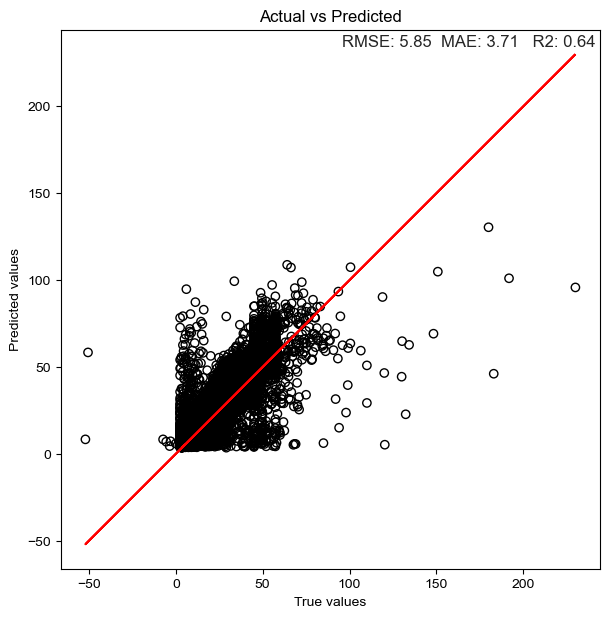

In [13]:
scattering_true_predicted_values(y_test, 
                                 random_forest_reg_predictions, 
                                 bootstrap_test_mean_rmse, 
                                 bootstrap_test_mean_mae, 
                                 bootstrap_test_mean_r2)

Lastly, we can visualize the feature importance of our random forest model in order to see what features were more important to make decisions.

In [14]:
# feature importance - random forest 
feature_importance_random_forest_reg = (
    pd.Series(
        random_forest_reg.feature_importances_,
        index=X_test_prepared.columns
    )
    .sort_values(
        ascending=False
    )
)

Text(0.5, 1.0, 'Visualizing Feature Importance - Random Forest')

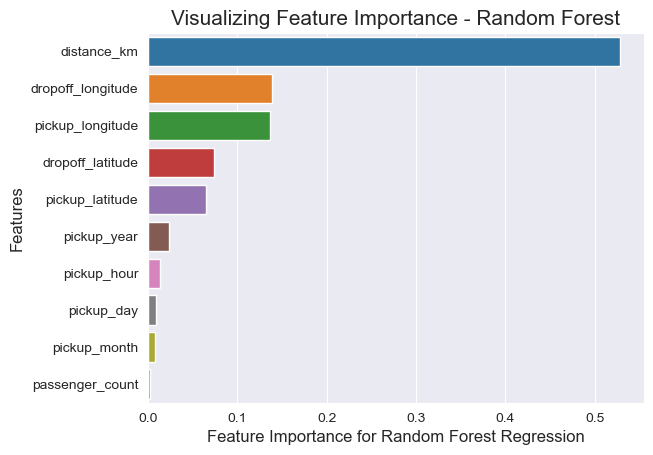

In [15]:
# plotting this feature importance 
sns.barplot(x=feature_importance_random_forest_reg, 
            y=feature_importance_random_forest_reg.index
)
plt.xlabel('Feature Importance for Random Forest Regression', 
           fontsize=12
)
plt.ylabel('Features', 
           fontsize=12
)
plt.title('Visualizing Feature Importance - Random Forest', 
          fontsize=15
)

As we see, the most important feature is `distance_km`, what is expected as we are dealing with rides of Uber. Now, we will repeat the same steps for XGBoost and LGBM models.

### XGBoost Regression

Continuing, we make the same process for XGBoost model:

In [16]:
# predictions for xgboost regression
xgboost_reg_predictions = xgboost_reg.predict(X_test_prepared)

In [17]:
bootstrap_metrics_calculator.calculating_bootstrapped_metrics(y_test, xgboost_reg_predictions, 500)

Calculating the RMSE, MAE and $R^{2}$ and their confidence intervals for XGBoost:

In [18]:
# mean value of bootstrapped results and confidence intervals - rmse
bootstrap_test_mean_rmse_xgboost = bootstrap_metrics_calculator.get_mean_rmse_metric()
lower_confidence_interval_rmse_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 2.5)
upper_confidence_interval_rmse_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 97.5)

In [19]:
# mean value of bootstrapped results and confidence interval - mae
bootstrap_test_mean_mae_xgboost = bootstrap_metrics_calculator.get_mean_mae_metric()
lower_confidence_interval_mae_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 2.5)
upper_confidence_interval_mae_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 97.5)

In [20]:
# mean value of bootstrapped results and confidence interval - r2
bootstrap_test_mean_r2_xgboost = bootstrap_metrics_calculator.get_mean_r2_metric()
lower_confidence_interval_r2_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 2.5)
upper_confidence_interval_r2_xgboost = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 97.5)

Our final results for XGBoost Regression are:

In [21]:
print(f'RMSE: {bootstrap_test_mean_rmse_xgboost:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_rmse_xgboost, 4), np.round(upper_confidence_interval_rmse_xgboost, 4)}')
print(f'MAE: {bootstrap_test_mean_mae_xgboost:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_mae_xgboost, 4), np.round(upper_confidence_interval_mae_xgboost, 4)}')
print(f'R2: {bootstrap_test_mean_r2_xgboost:.3f}, 95% Confidence Interval for R2: {np.round(lower_confidence_interval_r2_xgboost, 4), np.round(upper_confidence_interval_r2_xgboost, 4)}')

RMSE: 6.105, 95% Confidence Interval for RMSE: (5.7331, 6.4927)
MAE: 3.795, 95% Confidence Interval for RMSE: (3.6779, 3.9178)
R2: 0.603, 95% Confidence Interval for R2: (0.5537, 0.6486)


Let's visualize the scatter plot between true values and the predicted ones for the XGBoost:

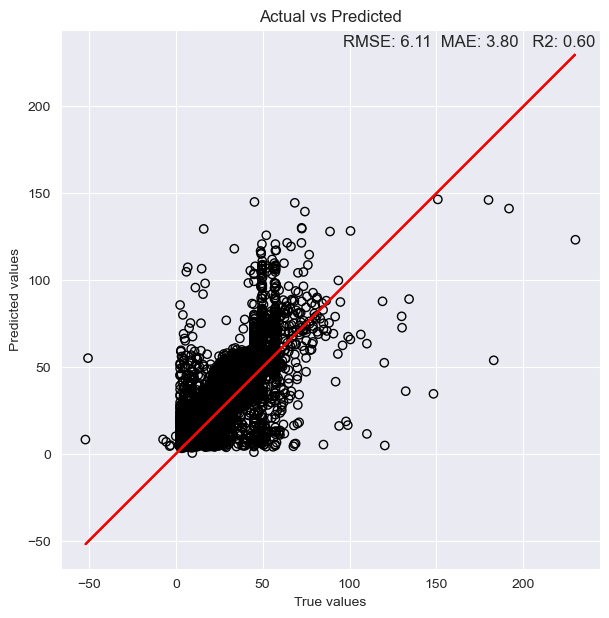

In [22]:
scattering_true_predicted_values(y_test, 
                                 xgboost_reg_predictions, 
                                 bootstrap_test_mean_rmse_xgboost, 
                                 bootstrap_test_mean_mae_xgboost, 
                                 bootstrap_test_mean_r2_xgboost)

Finally, the feature importance for XGBoost:

In [23]:
# feature importance - random forest 
feature_importance_xgboost_reg = (
    pd.Series(
        xgboost_reg.feature_importances_,
        index=X_test_prepared.columns
    )
    .sort_values(
        ascending=False
    )
)

Text(0.5, 1.0, 'Visualizing Feature Importance - XGBoost')

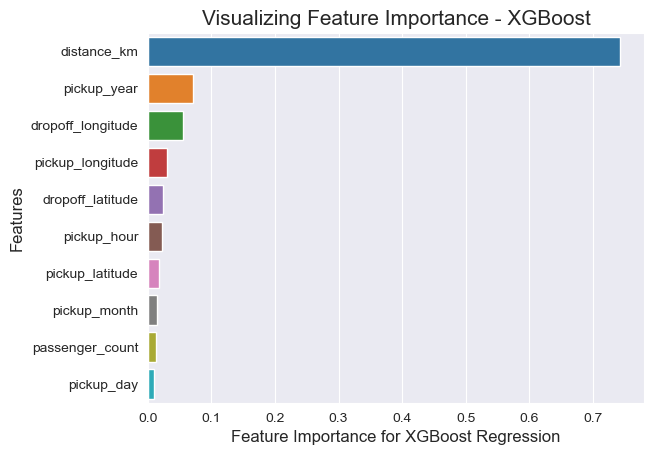

In [24]:
# plotting this feature importance 
sns.barplot(x=feature_importance_xgboost_reg, 
            y=feature_importance_xgboost_reg.index
)
plt.xlabel('Feature Importance for XGBoost Regression', 
           fontsize=12
)
plt.ylabel('Features', 
           fontsize=12
)
plt.title('Visualizing Feature Importance - XGBoost', 
          fontsize=15
)

### LGBM Regression

Finally, we make the same process for LGBM model:

In [30]:
# predictions for lgbm regression
lgbm_reg_predictions = lgbm_reg.predict(X_test_prepared)

In [31]:
bootstrap_metrics_calculator.calculating_bootstrapped_metrics(y_test, lgbm_reg_predictions, 500)

Calculating the RMSE, MAE and $R^{2}$ and their confidence intervals for LGBM:

In [32]:
# mean value of bootstrapped results and confidence intervals - rmse
bootstrap_test_mean_rmse_lgbm = bootstrap_metrics_calculator.get_mean_rmse_metric()
lower_confidence_interval_rmse_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 2.5)
upper_confidence_interval_rmse_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_rmse_values, 97.5)

In [33]:
# mean value of bootstrapped results and confidence interval - mae
bootstrap_test_mean_mae_lgbm = bootstrap_metrics_calculator.get_mean_mae_metric()
lower_confidence_interval_mae_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 2.5)
upper_confidence_interval_mae_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_mae_values, 97.5)

In [34]:
# mean value of bootstrapped results and confidence interval - r2
bootstrap_test_mean_r2_lgbm = bootstrap_metrics_calculator.get_mean_r2_metric()
lower_confidence_interval_r2_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 2.5)
upper_confidence_interval_r2_lgbm = np.percentile(bootstrap_metrics_calculator.bootstrapped_r2_values, 97.5)

Our final results for LGBM Regression are:

In [35]:
print(f'RMSE: {bootstrap_test_mean_rmse_lgbm:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_rmse_lgbm, 4), np.round(upper_confidence_interval_rmse_lgbm, 4)}')
print(f'MAE: {bootstrap_test_mean_mae_lgbm:.3f}, 95% Confidence Interval for RMSE: {np.round(lower_confidence_interval_mae_lgbm, 4), np.round(upper_confidence_interval_mae_lgbm, 4)}')
print(f'R2: {bootstrap_test_mean_r2_lgbm:.3f}, 95% Confidence Interval for R2: {np.round(lower_confidence_interval_r2_lgbm, 4), np.round(upper_confidence_interval_r2_lgbm, 4)}')

RMSE: 6.049, 95% Confidence Interval for RMSE: (5.7487, 6.477)
MAE: 3.787, 95% Confidence Interval for RMSE: (3.6821, 3.9123)
R2: 0.611, 95% Confidence Interval for R2: (0.5548, 0.6477)


Let's visualize the scatter plot between true values and the predicted ones for the LGBM:

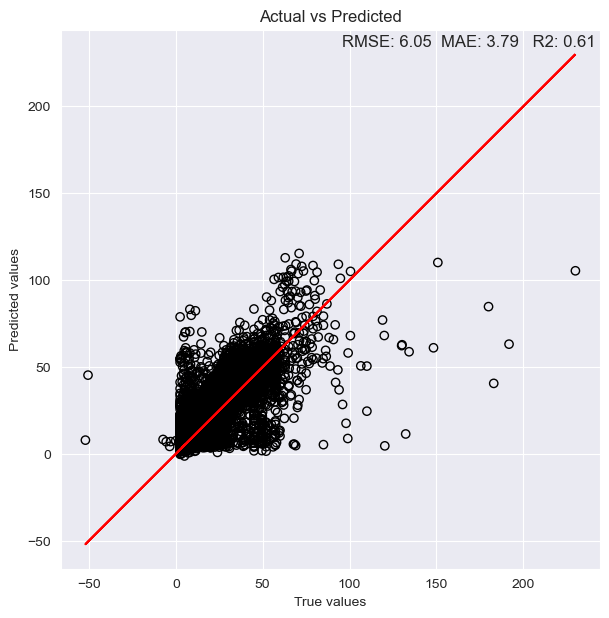

In [36]:
scattering_true_predicted_values(y_test, 
                                 lgbm_reg_predictions, 
                                 bootstrap_test_mean_rmse_lgbm, 
                                 bootstrap_test_mean_mae_lgbm, 
                                 bootstrap_test_mean_r2_lgbm)

Finally, the feature importance for LGBM

In [37]:
# feature importance - random forest 
feature_importance_lgbm_reg = (
    pd.Series(
        lgbm_reg.feature_importances_,
        index=X_test_prepared.columns
    )
    .sort_values(
        ascending=False
    )
)

Text(0.5, 1.0, 'Visualizing Feature Importance - LGBM')

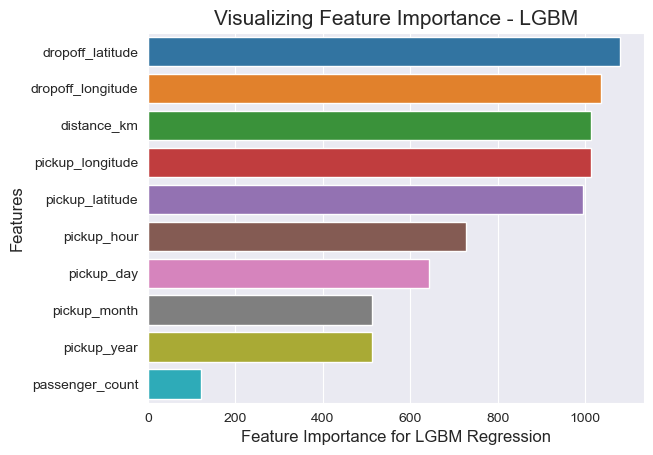

In [38]:
# plotting this feature importance 
sns.barplot(x=feature_importance_lgbm_reg, 
            y=feature_importance_lgbm_reg.index
)
plt.xlabel('Feature Importance for LGBM Regression', 
           fontsize=12
)
plt.ylabel('Features', 
           fontsize=12
)
plt.title('Visualizing Feature Importance - LGBM', 
          fontsize=15
)